In [61]:
from inference_sdk import InferenceHTTPClient
from inference_sdk import InferenceConfiguration
import json
import cv2
import os
from dotenv import load_dotenv
load_dotenv()

#input_img = "downloads/IMG_20240316_100346_782.jpg"

input_img = "downloads/rn_image_picker_lib_temp_0456fc88-11b7-4d96-885b-2646706d1a34.png"


CLIENT = InferenceHTTPClient(
    api_url="https://outline.roboflow.com", api_key=os.environ.get("ROBOFLOW_API_KEY")
)



In [62]:
#Inference
result = CLIENT.infer(input_img, model_id="bread-segmentation-hfhm8/4")

In [ ]:


img = cv2.imread(input_img)
for pred in result["predictions"]:
    if True or pred["class"] == "bread":
        label = pred["class"]
        x, w, y, h = (
            int(pred["x"]),
            int(pred["width"]),
            int(pred["y"]),
            int(pred["height"]),
        )
        cv2.rectangle(
            img,
            (x - w // 2, y - h // 2),
            (x + w // 2, y + h // 2),
            (255, 0, 255),
            8,
        )
        cv2.putText(
            img,
            label,
            (x, y - 5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            4,
        )
output_img = "testdata/results/roboflowresult.jpg"
cv2.imwrite(output_img, img)



In [63]:
jsonresults = "testsbreadcompute/dataBUNS.json"

with open(jsonresults, "w", encoding="utf-8") as f:
    json.dump(result, f, ensure_ascii=False, indent=4)

In [5]:
jsonresults = "testsbreadcompute/data.json"
with open(jsonresults) as f:
    result = json.load(f)

In [64]:
import supervision as sv
labels = [item["class"] for item in result["predictions"]]
detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator()
mask_annotator = sv.MaskAnnotator()

image = cv2.imread(input_img)
print(image.shape)



(3264, 1472, 3)


In [70]:
import numpy as np
print(detections.mask.shape)
print(image.shape)

def reshape_image_for_masking(image, mask):
    # Detections mask shape is (1, x, y)
    # Image shape (BGR) is (x, y, 3)
    x_img, y_img = image.shape[0], image.shape[1]
    x_mask, y_mask = mask.shape[1], mask.shape[2]
    reshaped_image = image # Init reshaped image as same dimension
    if x_img > x_mask and y_img > y_mask:
        # Original image is bigger so we just slice it
        return reshaped_image[:mask.shape[1], :mask.shape[2], :]
    else:
        if x_img > x_mask:
            # Slice the X dimension
            reshaped_image = reshaped_image[:mask.shape[1], :, :]
        elif x_img < x_mask:
            # Pad the X dimensions
            reshaped_image = np.pad(reshaped_image, ((0, x_mask - x_img), (0, 0), (0, 0)), mode='constant')
        if y_img > y_mask:
            # Slice the Y dimension
            reshaped_image[:, :mask.shape[2], :]
        elif y_img < y_mask:
            # Pad the Y dimension
            reshaped_image = np.pad(reshaped_image, ((0, 0), (0, y_mask - y_img), (0, 0)), mode='constant')

    

(2, 3264, 1473)
(3264, 1472, 3)


In [68]:
import numpy as np


reshaped_image = reshape_image_for_masking(image=image, mask=detections.mask)
print(f"Reshaped:{reshaped_image.shape}, Mask: {detections.mask.shape}, Original: {image.shape}")
    

Reshaped:(3264, 1472, 3), Mask: (2, 3264, 1473), Original: (3264, 1472, 3)


(2517, 3007, 3)


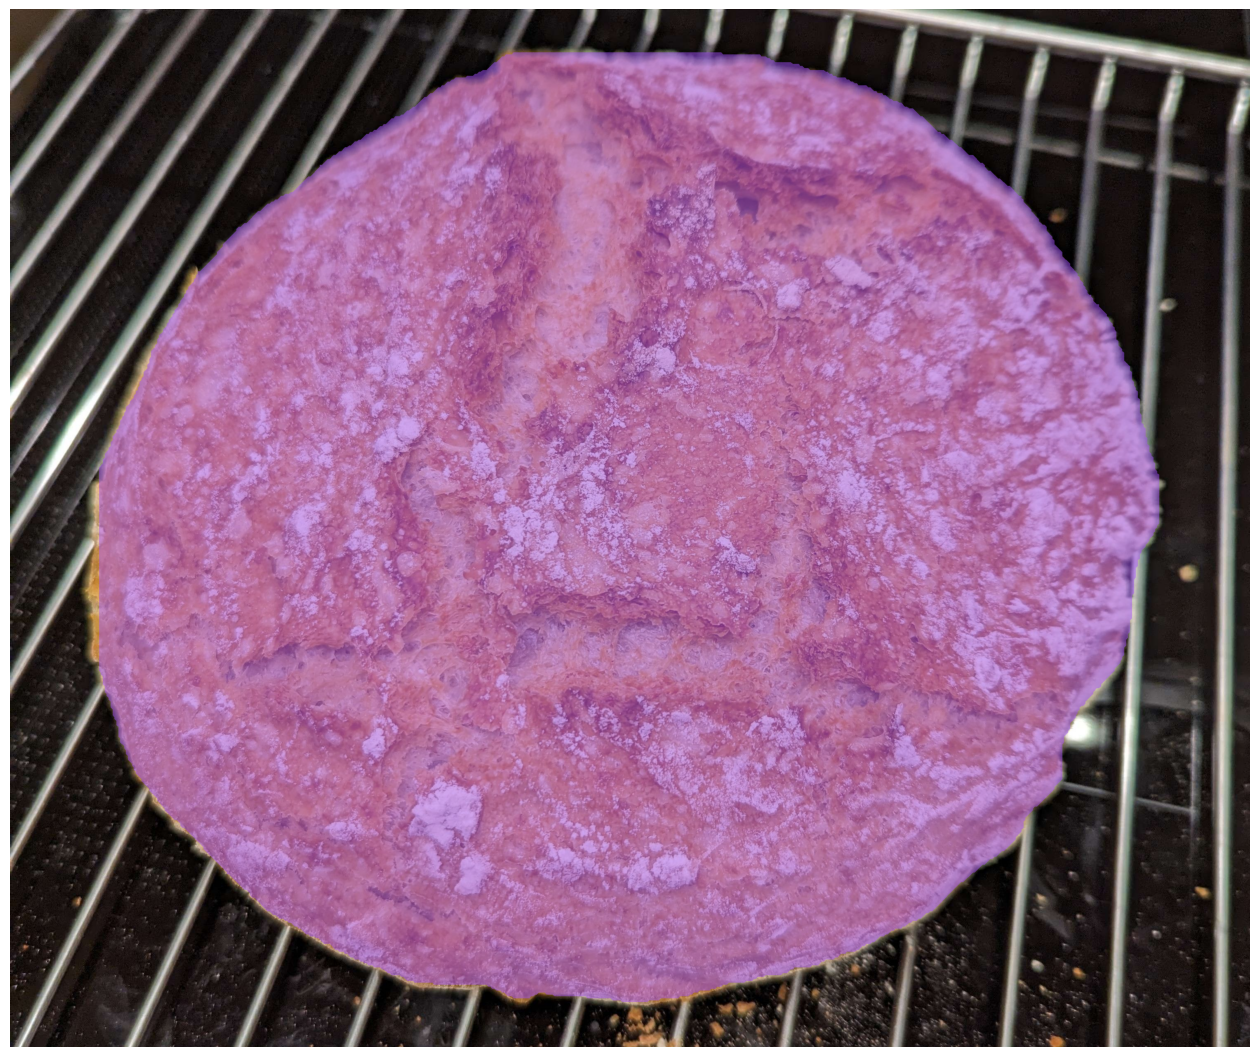

In [60]:
reshaped_image = reshape_image_for_masking2(image=image, mask=detections.mask)
annotated_image = mask_annotator.annotate(
    scene=reshaped_image, detections=detections)

print(annotated_image.shape)

sv.plot_image(image=annotated_image, size=(16, 16))


In [ ]:
annotated_image = annotated_image[:, :annotated_image.shape[1]-1, :]
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))

In [31]:
print(image.shape)
new_img = image[:, :image.shape[1]-1, :]
print(new_img.shape)


(3470, 2268, 3)
(3470, 2267, 3)


In [22]:
image.flatten().reshape((image.shape[0]-1, image.shape[0]-1, image.shape[0]-1))

ValueError: cannot reshape array of size 23609880 into shape (3469,3469,3469)

In [12]:
cv2.imwrite("testdata/results/svresult.png", annotated_image)
print("Saved")


Saved


In [19]:
result["predictions"][0]["points"]

[{'x': 2131.2, 'y': 249.6},
 {'x': 2124.8, 'y': 256.0},
 {'x': 1996.8, 'y': 256.0},
 {'x': 1990.4, 'y': 262.4},
 {'x': 1984.0, 'y': 262.4},
 {'x': 1977.6, 'y': 268.8},
 {'x': 1977.6, 'y': 275.2},
 {'x': 1971.2, 'y': 281.6},
 {'x': 1971.2, 'y': 288.0},
 {'x': 1932.8, 'y': 326.4},
 {'x': 1926.4, 'y': 326.4},
 {'x': 1920.0, 'y': 332.8},
 {'x': 1907.2, 'y': 332.8},
 {'x': 1900.8, 'y': 339.2},
 {'x': 1894.4, 'y': 339.2},
 {'x': 1894.4, 'y': 345.6},
 {'x': 1888.0, 'y': 352.0},
 {'x': 1881.6, 'y': 352.0},
 {'x': 1875.2, 'y': 358.4},
 {'x': 1868.8, 'y': 358.4},
 {'x': 1856.0, 'y': 371.2},
 {'x': 1849.6, 'y': 371.2},
 {'x': 1843.2, 'y': 377.6},
 {'x': 1830.4, 'y': 377.6},
 {'x': 1824.0, 'y': 384.0},
 {'x': 1798.4, 'y': 384.0},
 {'x': 1792.0, 'y': 390.4},
 {'x': 1721.6, 'y': 390.4},
 {'x': 1715.2, 'y': 396.8},
 {'x': 1702.4, 'y': 396.8},
 {'x': 1696.0, 'y': 403.2},
 {'x': 1689.6, 'y': 403.2},
 {'x': 1683.2, 'y': 409.6},
 {'x': 1664.0, 'y': 409.6},
 {'x': 1657.6, 'y': 416.0},
 {'x': 1644.8, 'y': 